<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [44]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns


%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [45]:
# Read Titanic Dataset
titanic_csv = 'titanic.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [46]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [47]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [48]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [49]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [50]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

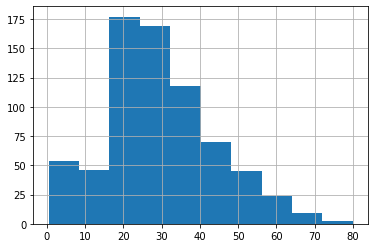

In [52]:
# ANSWER 
#Check for distribution of sample
titanic['Age'].hist()

In [53]:
# ANSWER 
# Find out Median/Mean age for each Gender 
gender_mean = titanic.groupby('Sex')['Age'].mean()
print(gender_mean)

gender_median = titanic.groupby('Sex')['Age'].median()
print(gender_median)

#Check if Passenger class have any relations
pcgender_mean = titanic.groupby(['Pclass','Sex'])['Age'].mean()
print(pcgender_mean)

pcgender_median = titanic.groupby(['Pclass','Sex'])['Age'].median()
print(pcgender_median)

#Use median as a substitution to fill the missing values 

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Sex
female    27.0
male      29.0
Name: Age, dtype: float64
Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


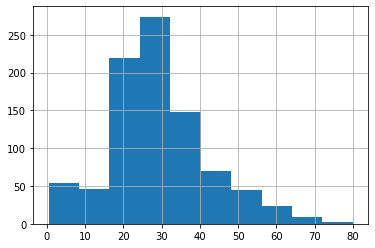

In [54]:
titanic['Age'] = titanic.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))
titanic['Age'].hist()

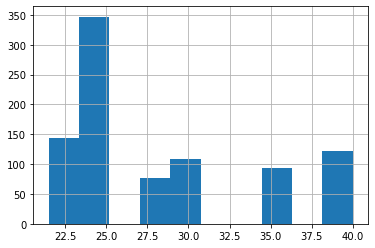

In [55]:
titanic['Age'] = titanic.groupby(['Pclass','Sex'])['Age'].transform('median')
titanic['Age'].hist()

### Cabin

In [56]:
# ANSWER
print(titanic['Cabin'].value_counts())
print(titanic['Cabin'].nunique())

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
D49            1
D28            1
C104           1
B80            1
F E69          1
Name: Cabin, Length: 147, dtype: int64
147


In [57]:
# After exploring the Cabin Column, decides to replace Null Values with Zero
# as the column is most likely to no have any importances. 
#In addition, the number of null values is too large to not impute any values
titanic['Cabin'] = titanic['Cabin'].fillna(0)


### Embarked

In [58]:
# ANSWER
titanic['Embarked'].mode()

titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Describe

Describe your dataset.

In [59]:
# ANSWER
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.405163,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,5.964948,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,21.500000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,25.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,30.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,40.000000,8.000000,6.000000,512.329200


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [60]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

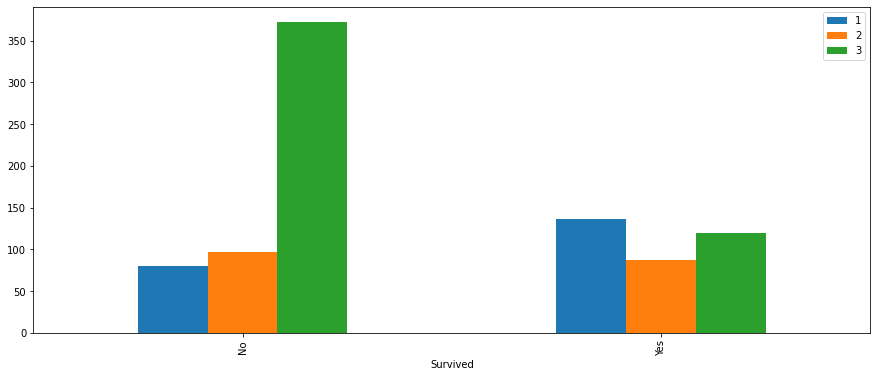

In [61]:
# ANSWER
bar_charts(titanic,'Pclass')

In [62]:
#Passengers from the 3rd class is most likely to not survive 
#while passngers from the first class are more likely to survive

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

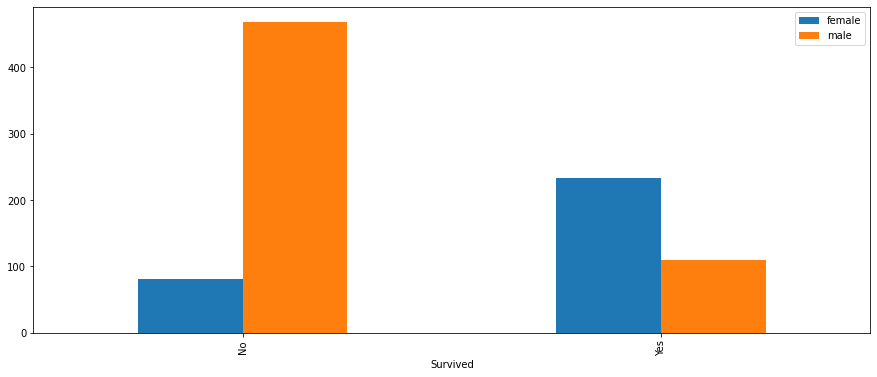

In [63]:
# ANSWER
bar_charts(titanic,'Sex')

#Females more likely to survive and Males more like to die

## Parch

Parch = Number of parents of children travelling with each passenger.

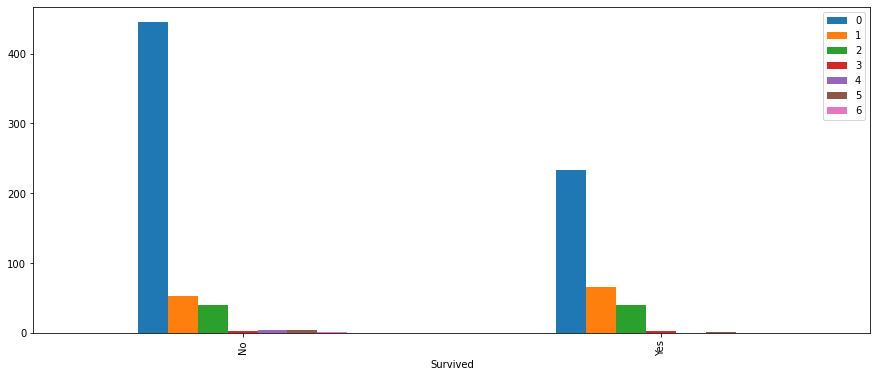

In [64]:
# ANSWER
bar_charts(titanic,'Parch')


## SibSp

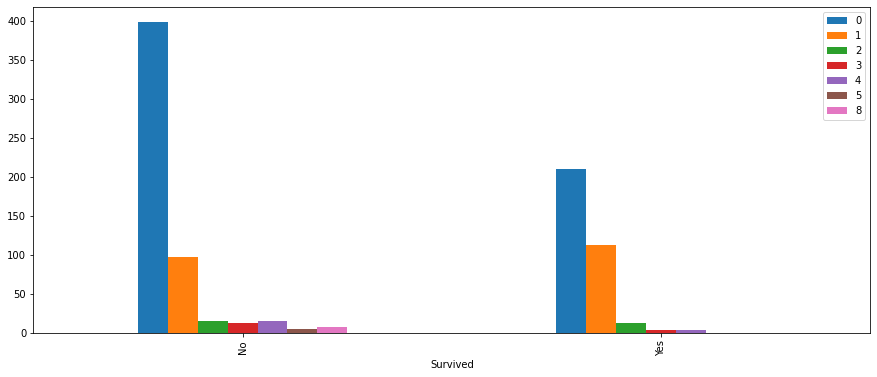

In [65]:
bar_charts(titanic,'SibSp')


## Embarked

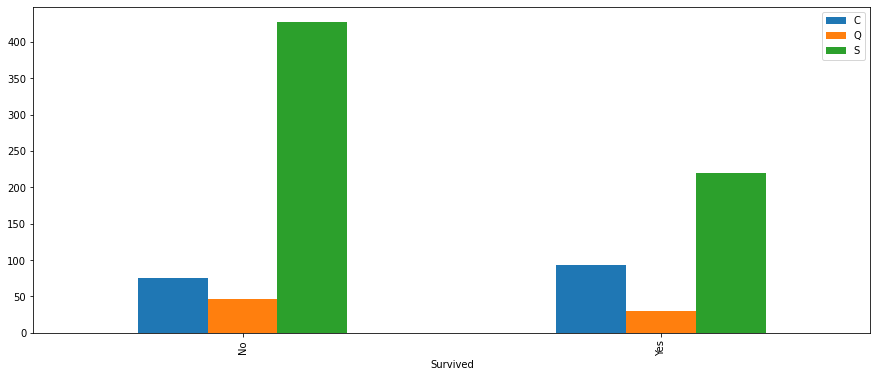

In [66]:
bar_charts(titanic,'Embarked')


# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [67]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [68]:
# ANSWER
titanic['fare_class'] = titanic['Fare'].apply(create_fare_class)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_class
0,1,0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,0,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,21.5,0,0,STON/O2. 3101282,7.9250,0,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,0,S,4


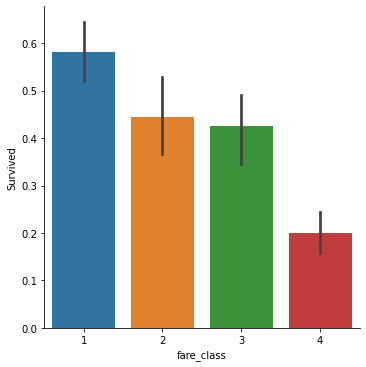

In [69]:
sns.catplot(kind='bar', x = 'fare_class', y = 'Survived', data = titanic)

## Age Class

In [70]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [71]:
# ANSWER

titanic['age_class'] = titanic['Age'].apply(create_age_class)

titanic.age_class.value_counts()

2    491
3    278
4    122
Name: age_class, dtype: int64

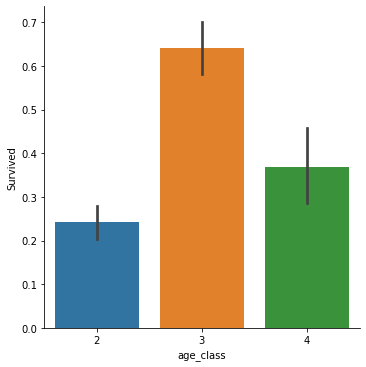

In [72]:
sns.catplot(kind='bar', x = 'age_class', y = 'Survived', data = titanic)

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [73]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,fare_class,age_class
PassengerId,1.000000,-0.005007,-0.035144,0.046365,-0.057527,-0.001652,0.012658,0.003258,0.027614
Survived,-0.005007,1.000000,-0.338481,0.179402,-0.035322,0.081629,0.257307,-0.307600,0.217198
Pclass,-0.035144,-0.338481,1.000000,-0.948605,0.083081,0.018443,-0.549500,0.719670,-0.932812
Age,0.046365,0.179402,-0.948605,1.000000,-0.111424,-0.084655,0.502707,-0.644694,0.940566
SibSp,-0.057527,-0.035322,0.083081,-0.111424,1.000000,0.414838,0.159651,-0.380692,-0.100620
Parch,-0.001652,0.081629,0.018443,-0.084655,0.414838,1.000000,0.216225,-0.387100,-0.035266
Fare,0.012658,0.257307,-0.549500,0.502707,0.159651,0.216225,1.000000,-0.599129,0.420417
fare_class,0.003258,-0.307600,0.719670,-0.644694,-0.380692,-0.387100,-0.599129,1.000000,-0.642342
age_class,0.027614,0.217198,-0.932812,0.940566,-0.100620,-0.035266,0.420417,-0.642342,1.000000


# [BONUS] Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [74]:
# ANSWER
titanic_young = titanic[titanic['Age'] < 35.0].sample(n =100)
titanic_young.shape

(100, 14)

In [75]:
titanic_old = titanic[titanic['Age'] > 35.0].sample(n = 100)
titanic_old.shape

(100, 14)

### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [76]:
# ANSWER

alpha = 0.05
N = 100

### Calculate point estimate

In [77]:
a = titanic_young['Survived']
b = titanic_old['Survived']

In [78]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

### Calculate test statistic

In [79]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [80]:
from scipy import stats

In [81]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

In [82]:
print("t = " + str(t))
print("p = " + str(2*p))

t = -2.5479017403912043
p = 1.9884037963230774


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [83]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [84]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -2.547901740391203
p = 0.011596203676922571
We reject our null hypothesis.




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



